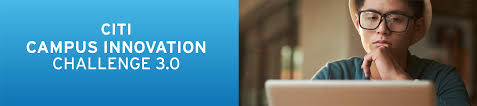

**CCIC-3.0-FINALE**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Training Data / Pre processing**

In [3]:
train = pd.read_csv('/content/drive/MyDrive/CCIC-3.0-FINALE/Train.csv')

Details of the feature

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430633 entries, 0 to 1430632
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   txn_refr_key_dummy    1430633 non-null  int64  
 1   rem_company_id_dummy  1430633 non-null  int64  
 2   rem_act_no_dummy      1430633 non-null  int64  
 3   bene_act_no_dummy     1430633 non-null  int64  
 4   txn_amt               1430633 non-null  float64
 5   transaction_val_dt    1430633 non-null  object 
 6   yearmonth             1430633 non-null  int64  
 7   txn_type              1430633 non-null  object 
 8   rem_company_ind       1430633 non-null  object 
 9   payroll_ind           1430633 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 109.1+ MB


Unique values in each feature

In [5]:
train.apply(lambda x: len(x.unique()))

txn_refr_key_dummy      1430633
rem_company_id_dummy       3333
rem_act_no_dummy           6099
bene_act_no_dummy        367299
txn_amt                  357639
transaction_val_dt          140
yearmonth                     6
txn_type                      2
rem_company_ind              12
payroll_ind                   2
dtype: int64

Number of values for each payroll indicator

In [6]:
train.groupby('payroll_ind').count()

,txn_refr_key_dummy,rem_company_id_dummy,rem_act_no_dummy,bene_act_no_dummy,txn_amt,transaction_val_dt,yearmonth,txn_type,rem_company_ind
payroll_ind,,,,,,,,,
0,1308694,1308694,1308694,1308694,1308694,1308694,1308694,1308694,1308694
1,121939,121939,121939,121939,121939,121939,121939,121939,121939


Dropping date and related features, and extracting day and month from them. Since the year is only for 2020-21, it can be dropped without any loss of data. Also removed the transaction reference key.

In [7]:
train_df = train.copy(deep=True)
train["transaction_val_dt"] = pd.to_datetime(train["transaction_val_dt"])
train["Months"] = train["transaction_val_dt"].dt.month
train["Date"] = train["transaction_val_dt"].dt.day
train.drop('transaction_val_dt', axis = 1, inplace = True)
train.drop('yearmonth', axis = 1, inplace = True)
train.drop('txn_refr_key_dummy', axis = 1, inplace = True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430633 entries, 0 to 1430632
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   rem_company_id_dummy  1430633 non-null  int64  
 1   rem_act_no_dummy      1430633 non-null  int64  
 2   bene_act_no_dummy     1430633 non-null  int64  
 3   txn_amt               1430633 non-null  float64
 4   txn_type              1430633 non-null  object 
 5   rem_company_ind       1430633 non-null  object 
 6   payroll_ind           1430633 non-null  int64  
 7   Months                1430633 non-null  int64  
 8   Date                  1430633 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 98.2+ MB


In [9]:
list(train.columns)

['rem_company_id_dummy',
 'rem_act_no_dummy',
 'bene_act_no_dummy',
 'txn_amt',
 'txn_type',
 'rem_company_ind',
 'payroll_ind',
 'Months',
 'Date']

In [10]:
train['rem_company_id_dummy'] = train['rem_company_id_dummy'].apply(str)
train['rem_act_no_dummy'] = train['rem_act_no_dummy'].apply(str)
train['Months'] = train['Months'].apply(str)
train['Date'] = train['Date'].apply(str)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430633 entries, 0 to 1430632
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   rem_company_id_dummy  1430633 non-null  object 
 1   rem_act_no_dummy      1430633 non-null  object 
 2   bene_act_no_dummy     1430633 non-null  int64  
 3   txn_amt               1430633 non-null  float64
 4   txn_type              1430633 non-null  object 
 5   rem_company_ind       1430633 non-null  object 
 6   payroll_ind           1430633 non-null  int64  
 7   Months                1430633 non-null  object 
 8   Date                  1430633 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 98.2+ MB


Splitting into categorical and continous features

In [12]:
#new
numerical_new = []
categorical_new = []
for column in train.columns:
  if train[column].dtype == 'object':
    categorical_new.append(column)
  else:
    numerical_new.append(column)

print("There are {} numerical and {} categorical variables".format(len(numerical_new), len(categorical_new)))

There are 3 numerical and 6 categorical variables


Transform Categorical variables using Target Encoding

In [13]:
!pip install category_encoders
from category_encoders import TargetEncoder
encoder = TargetEncoder(smoothing = 0.5)
train[categorical_new] = encoder.fit_transform(train[categorical_new],train['payroll_ind'])

     |████████████████████████████████| 81kB 3.7MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [14]:
train.head()

,rem_company_id_dummy,rem_act_no_dummy,bene_act_no_dummy,txn_amt,txn_type,rem_company_ind,payroll_ind,Months,Date
0,0.024768,0.0,8000000,1.458730,0.000002,0.085628,0,0.081293,0.070922
1,0.002540,0.0,8000200,1.269716,0.000002,0.032912,0,0.081293,0.008175
2,0.000000,0.0,8000300,1.190682,0.000002,0.302016,0,0.081293,0.087243
3,0.000000,0.0,8000500,5.657271,0.000002,0.200852,0,0.081293,0.012141
4,0.002540,0.0,8000600,1.239628,0.000002,0.032912,0,0.081293,0.012141


Split into train and test data for preliminary testinf(we learn from the whole data after hyperparameter Tuning is complete)

In [15]:
import seaborn as sb
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(train,  test_size=0.00001, stratify=train['payroll_ind'],random_state=22) # 0.25 x 0.8 = 0.2
X_train=df_train.copy()
Y_train=df_train['payroll_ind']
X_train=X_train.drop(columns=['payroll_ind'])
X_test=df_test.copy()
Y_test=df_test.copy()['payroll_ind']
X_test=X_test.drop(columns=['payroll_ind'])


In [16]:
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 69.2MB 41kB/s 


In [17]:
# Helper function to create confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Accent')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### **Model building**

Using CatboostClassifier for our prediction model. 

In [19]:
model = CatBoostClassifier(iterations=2000, learning_rate=0.05, depth=10, eval_metric = 'F1', l2_leaf_reg = 0.5, per_float_feature_quantization = ['0:border_count=1024', '1:border_count=1024'])
model.fit(X_train, Y_train)
# Get predictions
preds = model.predict(X_test)

0:	learn: 0.8833697	total: 1.32s	remaining: 44m
1:	learn: 0.8999772	total: 2.56s	remaining: 42m 40s
2:	learn: 0.9022989	total: 3.82s	remaining: 42m 22s
3:	learn: 0.9035737	total: 4.96s	remaining: 41m 15s
4:	learn: 0.9064065	total: 6.13s	remaining: 40m 47s
5:	learn: 0.9067461	total: 7.25s	remaining: 40m 9s
6:	learn: 0.9068226	total: 8.38s	remaining: 39m 47s
7:	learn: 0.9079165	total: 9.48s	remaining: 39m 21s
8:	learn: 0.9081963	total: 10.6s	remaining: 39m 1s
9:	learn: 0.9082964	total: 11.7s	remaining: 38m 55s
10:	learn: 0.9084769	total: 12.8s	remaining: 38m 33s
11:	learn: 0.9088160	total: 13.9s	remaining: 38m 21s
12:	learn: 0.9090081	total: 15.1s	remaining: 38m 22s
13:	learn: 0.9085955	total: 16.2s	remaining: 38m 24s
14:	learn: 0.9088665	total: 17.4s	remaining: 38m 29s
15:	learn: 0.9089920	total: 18.7s	remaining: 38m 33s
16:	learn: 0.9092644	total: 19.8s	remaining: 38m 28s
17:	learn: 0.9100518	total: 21s	remaining: 38m 30s
18:	learn: 0.9101300	total: 22.1s	remaining: 38m 24s
19:	learn: 

### **Model Evaluation**

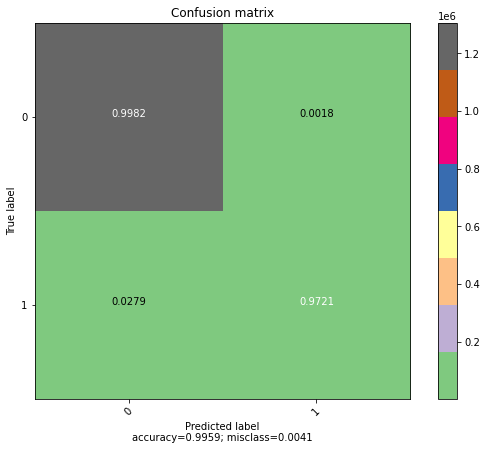

Testing f1 score - 0.976066665843225
Testing accuracy 0.9959367210534189
Classification report for XGBoost model (Train data)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1308680
           1       0.98      0.97      0.98    121938

    accuracy                           1.00   1430618
   macro avg       0.99      0.99      0.99   1430618
weighted avg       1.00      1.00      1.00   1430618



In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
Y_train_pred=model.predict(X_train)
confusionMatrix = confusion_matrix(Y_train,Y_train_pred)
plot_confusion_matrix(confusionMatrix,[0,1])
print("Testing f1 score - "+str(f1_score(Y_train, Y_train_pred)))
print("Testing accuracy "+str(accuracy_score(Y_train, Y_train_pred)))
print("Classification report for XGBoost model (Train data)")
print(classification_report(Y_train, Y_train_pred))

### **Pre-processing and Wrangling the Test Data**

In [22]:
test = pd.read_csv('/content/drive/MyDrive/CCIC-3.0-FINALE/Test_fin.csv')

In [23]:
test.info()
test2=test.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614021 entries, 0 to 614020
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   txn_refr_key_dummy    614021 non-null  int64  
 1   rem_company_id_dummy  614021 non-null  int64  
 2   rem_act_no_dummy      614021 non-null  int64  
 3   bene_act_no_dummy     614021 non-null  int64  
 4   txn_amt               614021 non-null  float64
 5   transaction_val_dt    614021 non-null  object 
 6   yearmonth             614021 non-null  int64  
 7   txn_type              614021 non-null  object 
 8   rem_company_ind       614021 non-null  object 
 9   rem_plus_bene         614021 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 46.8+ MB


In [24]:
test.apply(lambda x: len(x.unique()))

txn_refr_key_dummy      614021
rem_company_id_dummy      2490
rem_act_no_dummy          4206
bene_act_no_dummy       160732
txn_amt                 211941
transaction_val_dt         137
yearmonth                    6
txn_type                     2
rem_company_ind             12
rem_plus_bene           164056
dtype: int64

Performing Preprocessing on test data

In [25]:
test["transaction_val_dt"] = pd.to_datetime(test["transaction_val_dt"])
test["Months"] = test["transaction_val_dt"].dt.month
test["Date"] = test["transaction_val_dt"].dt.day
test.drop('transaction_val_dt', axis = 1, inplace = True)
test.drop('yearmonth', axis = 1, inplace = True)
test.drop('txn_refr_key_dummy', axis = 1, inplace = True)
test.drop('rem_plus_bene', axis = 1, inplace = True)
test['rem_company_id_dummy'] = test['rem_company_id_dummy'].apply(str)
test['rem_act_no_dummy'] = test['rem_act_no_dummy'].apply(str)
test['Months'] = test['Months'].apply(str)
test['Date'] = test['Date'].apply(str)

Classifying features as categorical and numerical

In [26]:
numerical_test_new = []
categorial_test_new = []
for column in test.columns:
  if test[column].dtype == 'object':
    categorial_test_new.append(column)
  else:
    numerical_test_new.append(column)

In [27]:
print("There are {} numerical_test and {} categorial_test variables".format(len(numerical_test_new), len(categorial_test_new)))

There are 2 numerical_test and 6 categorial_test variables


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614021 entries, 0 to 614020
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   rem_company_id_dummy  614021 non-null  object 
 1   rem_act_no_dummy      614021 non-null  object 
 2   bene_act_no_dummy     614021 non-null  int64  
 3   txn_amt               614021 non-null  float64
 4   txn_type              614021 non-null  object 
 5   rem_company_ind       614021 non-null  object 
 6   Months                614021 non-null  object 
 7   Date                  614021 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.5+ MB


Performing Target encoding on Categorical variables in test data

In [29]:
test[categorial_test_new] = encoder.transform(test[categorial_test_new])

In [30]:
test.head()

,rem_company_id_dummy,rem_act_no_dummy,bene_act_no_dummy,txn_amt,txn_type,rem_company_ind,Months,Date
0,0.000000,0.000000,8000700,2.339769,0.132526,0.123219,0.081293,0.080821
1,0.000000,0.000000,8000700,2.339383,0.132526,0.123219,0.081293,0.008175
2,0.002571,0.002585,8000900,1.587912,0.132526,0.016021,0.081293,0.011525
3,0.002571,0.002585,8001000,2.253511,0.132526,0.016021,0.081293,0.247569
4,0.002571,0.002585,8001000,1.864050,0.132526,0.016021,0.081293,0.074901


In [31]:
payroll_pred = model.predict(test)
print(payroll_pred)
submission=pd.DataFrame({'txn_refr_key_dummy':test2['txn_refr_key_dummy'],'payroll_ind':payroll_pred})
submission.to_csv('sub.csv',index=False)

[0 0 0 ... 0 0 0]


A view of the Test Data (Answer)

In [32]:
submission

,txn_refr_key_dummy,payroll_ind
0,9,0
1,10,0
2,12,0
3,13,0
4,14,0
...,...,...
614016,3220216,0
614017,3220219,0
614018,3220220,0
614019,3220221,0


In [33]:
import pickle
# pickle.save(model,"model_CatBoost")

In [34]:
# from skmultilearn.adapt import MLkNN 
# importing all the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
clf3 = RandomForestClassifier(verbose=2,class_weight="balanced",n_jobs=-1)
clf3.fit(X_train, Y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   49.5s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

In [37]:
# using VotingClassifier as an aggregate of XGBRF and RF
clf4= VotingClassifier(estimators=[('catboost',model),('RF', clf3)],voting='soft',weights=[8,1],n_jobs=-1)
clf4.fit(X_train,Y_train)

VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7fb9b7052990>),
                             ('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight='balanced',
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                         

In [38]:
dt_balanced= DecisionTreeClassifier()
dt_balanced.fit(X_train, Y_train)
# 94.65 f1 score for decision Tree
# pickle.dump(dt_balanced, open("model_DecisionTreeweighted", 'wb'))
# Creating answer set for decision Trees
# payroll_pred = dt_balanced.predict(test)
# print(payroll_pred)
# submission=pd.DataFrame({'txn_refr_key_dummy':test2['txn_refr_key_dummy'],'payroll_ind':payroll_pred})
# submission.to_csv('sub_dt.csv',index=False)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
logreg= LogisticRegression(max_iter=1000,class_weight="balanced")
logreg.fit(X_train, Y_train)
pickle.dump(logreg, open("model_Logistic_reg_weighted", 'wb'))
# Creating answer set for decision Trees
payroll_pred = logreg.predict(test)
print(payroll_pred)
submission=pd.DataFrame({'txn_refr_key_dummy':test2['txn_refr_key_dummy'],'payroll_ind':payroll_pred})
submission.to_csv('sub_logreg.csv',index=False)

[0 0 0 ... 0 0 0]


Creating ensemble test data

In [40]:
payroll_pred = clf4.predict(test)
print(payroll_pred)
submission=pd.DataFrame({'txn_refr_key_dummy':test2['txn_refr_key_dummy'],'payroll_ind':payroll_pred})
submission.to_csv('sub_ensemble.csv',index=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.0s finished


[0 0 0 ... 0 0 0]


In [41]:
# pickle.dump(clf3, open("model_Randomforestweighted", 'wb'))
# pickle.dump(clf4, open("model_voting_catboost2000_nonreme_rfweight_10_1", 'wb'))

In [42]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance


     |████████████████████████████████| 112kB 5.4MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [43]:
from eli5.permutation_importance import get_score_importances
from sklearn.metrics import f1_score
# Function to compute generic model feature importance
# Aborted since it takes a vlong time to run
# # ... load data, define score function
# def score(X, y):
#     y_pred = clf4.predict(X)
#     return f1_score(y, y_pred)

# base_score, score_decreases = get_score_importances(score, X_train, Y_train,n_jobs=-1)
# feature_importances = np.mean(score_decreases, axis=0)
# feature_importances

Feature: rem_company_id_dummy, Score: 3.17142
Feature: rem_act_no_dummy, Score: 17.52948
Feature: bene_act_no_dummy, Score: 18.63644
Feature: txn_amt, Score: 14.37293
Feature: txn_type, Score: 13.03224
Feature: rem_company_ind, Score: 16.78754
Feature: Months, Score: 4.90392
Feature: Date, Score: 11.56604


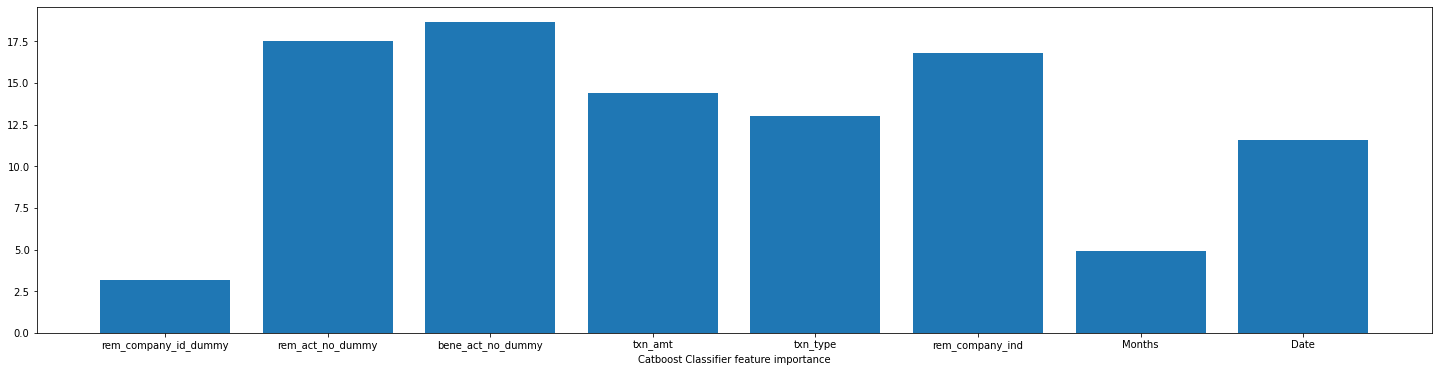

In [44]:
from matplotlib import pyplot
importances_dt = model.get_feature_importance()
fig, ax = plt.subplots(figsize=(25,6))
ax.bar(X_train.columns, importances_dt)
pyplot.xlabel("Catboost Classifier feature importance")
for i,v in enumerate(importances_dt):
	print('Feature: '+str(X_train.columns[i])+', Score: %.5f' % (v))

Feature: rem_company_id_dummy, Score: 0.29325
Feature: rem_act_no_dummy, Score: 0.41473
Feature: bene_act_no_dummy, Score: 0.03821
Feature: txn_amt, Score: 0.11868
Feature: txn_type, Score: 0.04604
Feature: rem_company_ind, Score: 0.04255
Feature: Months, Score: 0.00487
Feature: Date, Score: 0.04167


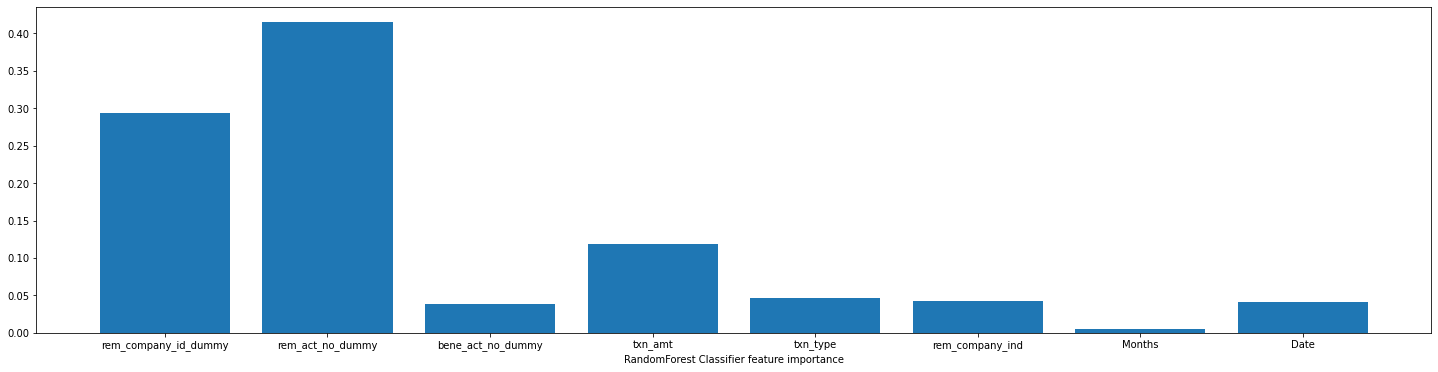

In [45]:
from matplotlib import pyplot
importances_dt = clf3.feature_importances_
fig, ax = plt.subplots(figsize=(25,6))
ax.bar(X_train.columns, importances_dt)
pyplot.xlabel("RandomForest Classifier feature importance")
for i,v in enumerate(importances_dt):
	print('Feature: '+str(X_train.columns[i])+', Score: %.5f' % (v))

Feature: rem_company_id_dummy, Score: 0.01816
Feature: rem_act_no_dummy, Score: 0.79139
Feature: bene_act_no_dummy, Score: 0.06621
Feature: txn_amt, Score: 0.06795
Feature: txn_type, Score: 0.00477
Feature: rem_company_ind, Score: 0.00780
Feature: Months, Score: 0.00721
Feature: Date, Score: 0.03651


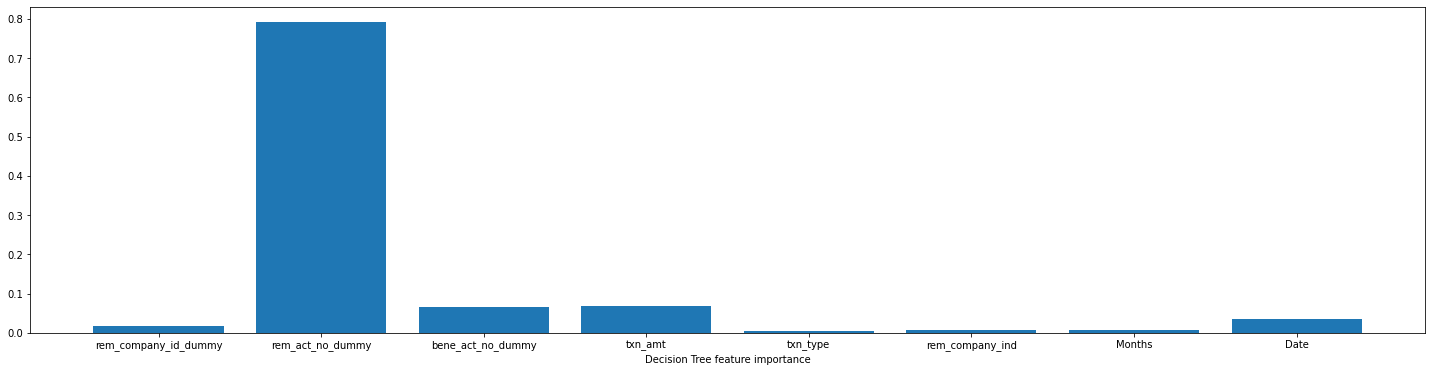

In [46]:
from matplotlib import pyplot
importances_dt = dt_balanced.feature_importances_
fig, ax = plt.subplots(figsize=(25,6))
ax.bar(X_train.columns, importances_dt)
pyplot.xlabel("Decision Tree feature importance")
for i,v in enumerate(importances_dt):
	print('Feature: '+str(X_train.columns[i])+', Score: %.5f' % (v))

A stark observation clearly observable which can explain the superiority of the Catboost Classifier as compared to Decision Tree and Randomforest is that Catboost gives equitable importance to all features. By contrast, RandomForest gives high importance to Remitter Account number, and Remitter Company ID, while Decision Tree gives high importance only to Remitter account number only.